In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [5]:
df_1 = df.rename(columns = {'cp':'chest_pain', 'trtbps':'blood_pressure', 'thalachh':'max_heart_rate', 'restecg':'rest_ecg', 'output': 'disease'})
df_1

,age,sex,chest_pain,blood_pressure,chol,fbs,rest_ecg,max_heart_rate,exng,oldpeak,slp,caa,thall,disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
df.isnull().any()

age         False
sex         False
cp          False
trtbps      False
chol        False
fbs         False
restecg     False
thalachh    False
exng        False
oldpeak     False
slp         False
caa         False
thall       False
output      False
dtype: bool

In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

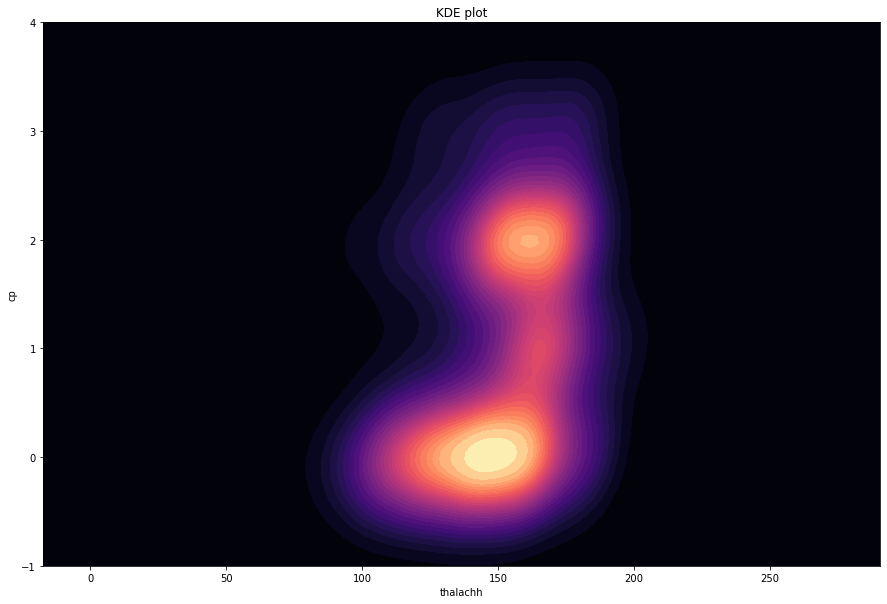

In [26]:
cmap = sns.color_palette("magma", as_cmap=True)
fig, ax = plt.subplots(figsize = (15,10))
sns.kdeplot(data = df,
    x="thalachh", y="cp",
    cmap=cmap, fill=True, cut=10,
    thresh=0, levels=30, ax = ax
).set(title = 'KDE plot')
ax.set_ylim(-1,4)
plt.show()

In [7]:
df_1['sex'] = df['sex'].map({1: "Male", 0: "Female"})
df_1['chest_pain'] = df['cp'].map({1: "Typical angina", 2: "Atypical angina", 3:"Non-angina pain", 0: "Asymptomatic"})
df_1['fbs'] = df['fbs'].map({1: "True", 0: "False"})
df_1['rest_ecg'] = df['restecg'].map({0: 'Normal', 1: 'Having wave abnormality', 2: 'Left ventricular hypertrophy'})
df_1['disease'] = df['output'].map({0: 'No', 1: 'Yes'})
df_1

,age,sex,chest_pain,blood_pressure,chol,fbs,rest_ecg,max_heart_rate,exng,oldpeak,slp,caa,thall,disease
0,63,Male,Non-angina pain,145,233,True,Normal,150,0,2.3,0,0,1,Yes
1,37,Male,Atypical angina,130,250,False,Having wave abnormality,187,0,3.5,0,0,2,Yes
2,41,Female,Typical angina,130,204,False,Normal,172,0,1.4,2,0,2,Yes
3,56,Male,Typical angina,120,236,False,Having wave abnormality,178,0,0.8,2,0,2,Yes
4,57,Female,Asymptomatic,120,354,False,Having wave abnormality,163,1,0.6,2,0,2,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,Asymptomatic,140,241,False,Having wave abnormality,123,1,0.2,1,0,3,No
299,45,Male,Non-angina pain,110,264,False,Having wave abnormality,132,0,1.2,1,0,3,No
300,68,Male,Asymptomatic,144,193,True,Having wave abnormality,141,0,3.4,1,2,3,No
301,57,Male,Asymptomatic,130,131,False,Having wave abnormality,115,1,1.2,1,1,3,No


In [8]:
df_1.describe()[['age', 'blood_pressure', 'chol', 'max_heart_rate']]

,age,blood_pressure,chol,max_heart_rate
count,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865
std,9.082101,17.538143,51.830751,22.905161
min,29.000000,94.000000,126.000000,71.000000
25%,47.500000,120.000000,211.000000,133.500000
50%,55.000000,130.000000,240.000000,153.000000
75%,61.000000,140.000000,274.500000,166.000000
max,77.000000,200.000000,564.000000,202.000000


In [9]:
#Геометрическое среднее по возрасту, давлению, содержанию холестерина и максимальной частоте сердцебиения
g_mean = stats.gmean(df_1[['age', 'blood_pressure', 'chol', 'max_heart_rate']])
g_mean

array([ 53.5699673 , 130.50294668, 241.17275766, 147.74022825])

In [10]:
#Геометрическое стандартное отклонение по возрасту, давлению, содержанию холестерина и максимальной частоте сердцебиения
g_std = stats.gstd(df_1[['age', 'blood_pressure', 'chol', 'max_heart_rate']])
g_std

array([1.19134963, 1.13904564, 1.22606304, 1.17910129])

# Визуализация

In [13]:
df_disease = df_1[df_1['disease'] == 'Yes']
df_disease

,age,sex,chest_pain,blood_pressure,chol,fbs,rest_ecg,max_heart_rate,exng,oldpeak,slp,caa,thall,disease
0,63,Male,Non-angina pain,145,233,True,Normal,150,0,2.3,0,0,1,Yes
1,37,Male,Atypical angina,130,250,False,Having wave abnormality,187,0,3.5,0,0,2,Yes
2,41,Female,Typical angina,130,204,False,Normal,172,0,1.4,2,0,2,Yes
3,56,Male,Typical angina,120,236,False,Having wave abnormality,178,0,0.8,2,0,2,Yes
4,57,Female,Asymptomatic,120,354,False,Having wave abnormality,163,1,0.6,2,0,2,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,Male,Typical angina,120,240,False,Having wave abnormality,169,0,0.0,0,0,2,Yes
161,55,Female,Typical angina,132,342,False,Having wave abnormality,166,0,1.2,2,0,2,Yes
162,41,Male,Typical angina,120,157,False,Having wave abnormality,182,0,0.0,2,0,2,Yes
163,38,Male,Atypical angina,138,175,False,Having wave abnormality,173,0,0.0,2,4,2,Yes


In [15]:
df_no_disease = df_1[df_1['disease'] == 'No']
df_no_disease

,age,sex,chest_pain,blood_pressure,chol,fbs,rest_ecg,max_heart_rate,exng,oldpeak,slp,caa,thall,disease
165,67,Male,Asymptomatic,160,286,False,Normal,108,1,1.5,1,3,2,No
166,67,Male,Asymptomatic,120,229,False,Normal,129,1,2.6,1,2,3,No
167,62,Female,Asymptomatic,140,268,False,Normal,160,0,3.6,0,2,2,No
168,63,Male,Asymptomatic,130,254,False,Normal,147,0,1.4,1,1,3,No
169,53,Male,Asymptomatic,140,203,True,Normal,155,1,3.1,0,0,3,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,Asymptomatic,140,241,False,Having wave abnormality,123,1,0.2,1,0,3,No
299,45,Male,Non-angina pain,110,264,False,Having wave abnormality,132,0,1.2,1,0,3,No
300,68,Male,Asymptomatic,144,193,True,Having wave abnormality,141,0,3.4,1,2,3,No
301,57,Male,Asymptomatic,130,131,False,Having wave abnormality,115,1,1.2,1,1,3,No


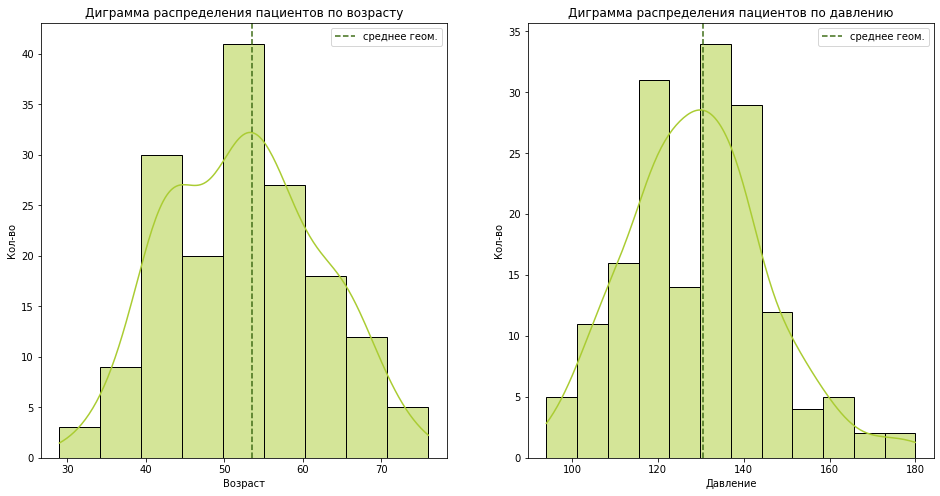

In [12]:
plt.figure(figsize=(16,8))

ax1 = plt.subplot(1, 2, 1) 
h1 = sns.histplot(data = df_1[df_1['disease'] == 'Yes'], x = 'age', kde = True, color = '#aacc33')
h1.set(xlabel = 'Возраст', ylabel = 'Кол-во', title = 'Диграмма распределения пациентов по возрасту')
plt.axvline(x=g_mean[0], ls = '--', color = '#3F6D16', label = 'среднее геом.')
plt.legend()

ax2 = plt.subplot(1, 2, 2) 
h2 = sns.histplot(data = df_1[df_1['disease'] == 'Yes'], x = 'blood_pressure', kde = True, color = '#aacc33')
h2.set(xlabel = 'Давление', ylabel = 'Кол-во', title = 'Диграмма распределения пациентов по давлению')
plt.axvline(x=g_mean[1], ls = '--', color = '#3F6D16', label = 'среднее геом.')
plt.legend()
plt.show()

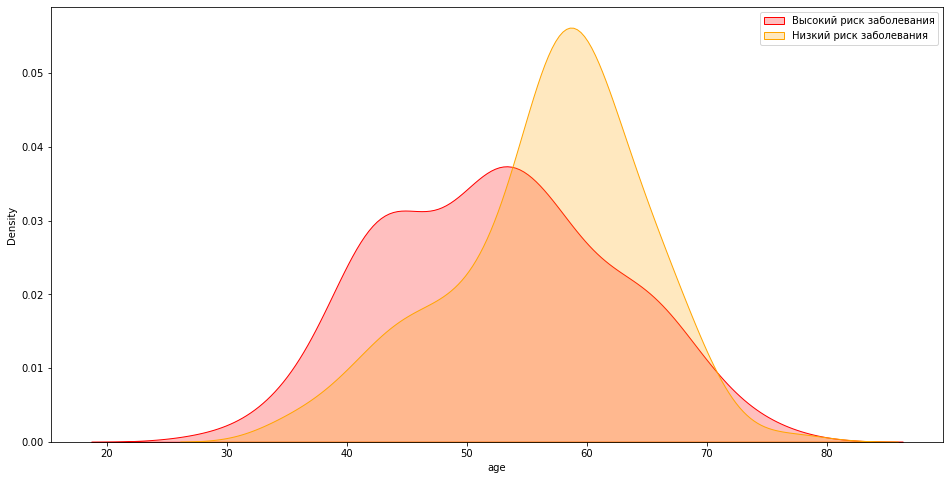

In [28]:
plt.figure(figsize=(16,8))

sns.kdeplot(df_disease['age'],color = 'red',shade='red', label = 'Высокий риск заболевания')
sns.kdeplot(df_no_disease['age'],color = 'orange',shade='orange', label = 'Низкий риск заболевания')
plt.legend()

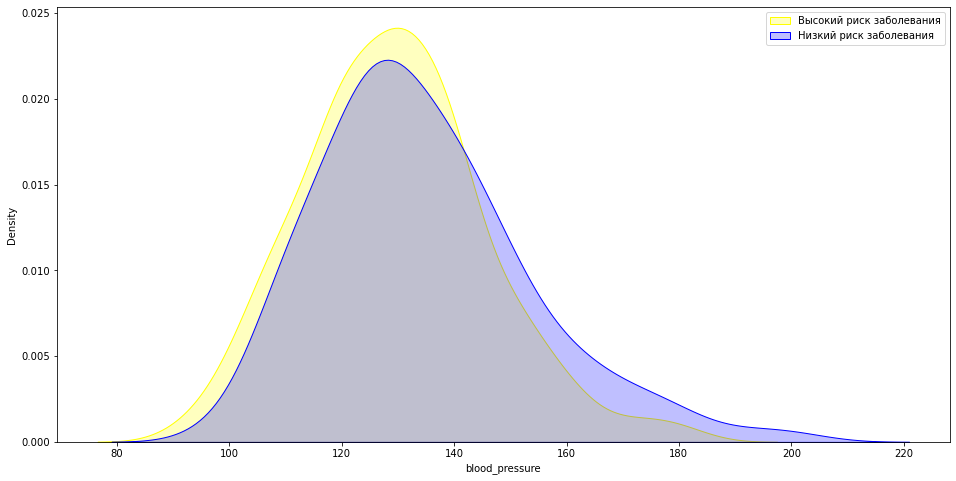

In [29]:
plt.figure(figsize=(16,8))

sns.kdeplot(df_disease['blood_pressure'],color = 'yellow',shade='yellow', label = 'Высокий риск заболевания')
sns.kdeplot(df_no_disease['blood_pressure'],color = 'blue',shade='blue', label = 'Низкий риск заболевания')
plt.legend()

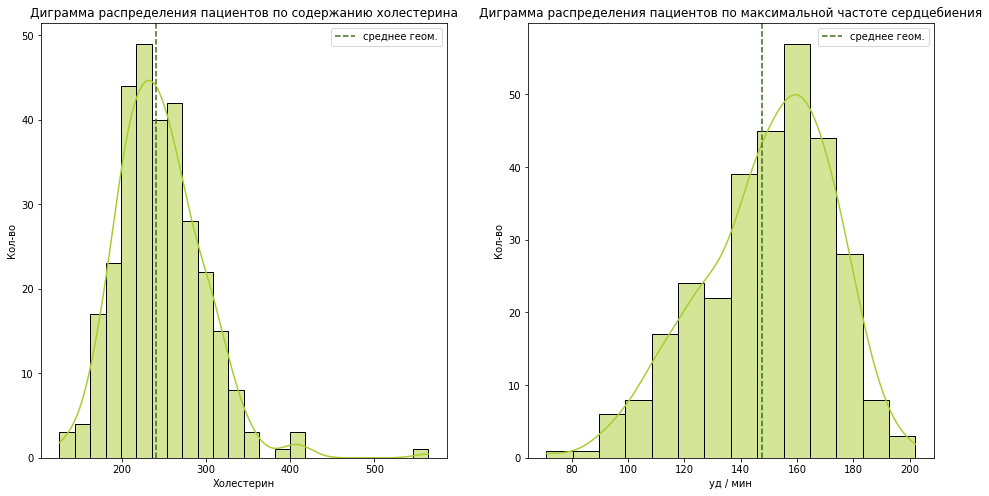

In [168]:
plt.figure(figsize=(16,8))

ax1 = plt.subplot(1, 2, 1) 
h1 = sns.histplot(data = df_1, x = 'chol', kde = True, color = '#aacc33')
h1.set(xlabel = 'Холестерин', ylabel = 'Кол-во', title = 'Диграмма распределения пациентов по содержанию холестерина')
plt.axvline(x=g_mean[2], ls = '--', color = '#3F6D16', label = 'среднее геом.')
plt.legend()

ax2 = plt.subplot(1, 2, 2) 
h2 = sns.histplot(data = df_1, x = 'max_heart_rate', kde = True, color = '#aacc33')
h2.set(xlabel = 'уд / мин', ylabel = 'Кол-во', title = 'Диграмма распределения пациентов по максимальной частоте сердцебиения')
plt.axvline(x=g_mean[3], ls = '--', color = '#3F6D16', label = 'среднее геом.')
plt.legend()
plt.show()

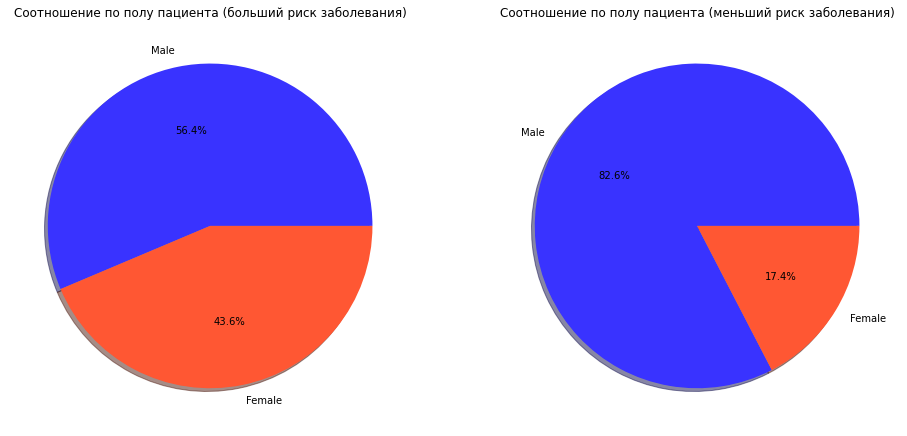

In [16]:
plt.figure(figsize=(16,10))

ax1 = plt.subplot(1, 2, 1) 
#h = sns.histplot(data = df_1, x = 'sex', palette = ['#3933FF', '#FF5733'], hue = 'sex', shrink=.8)
#h.set(xlabel = 'Пол', title = 'Соотношение по полу пациента')
num_male = df_disease['sex'][df_disease['sex'] == 'Male'].count()
num_female = df_disease['sex'][df_disease['sex'] == 'Female'].count()
plt.pie([num_male, num_female], labels=  ['Male', 'Female'], shadow = True, autopct='%1.1f%%', colors = ['#3933FF', '#FF5733'])
plt.title('Соотношение по полу пациента (больший риск заболевания)')

ax2 = plt.subplot(1, 2, 2) 
num_male = df_no_disease['sex'][df_no_disease['sex'] == 'Male'].count()
num_female = df_no_disease['sex'][df_no_disease['sex'] == 'Female'].count()
plt.pie([num_male, num_female], labels=  ['Male', 'Female'], shadow = True, autopct='%1.1f%%', colors = ['#3933FF', '#FF5733'])
plt.title('Соотношение по полу пациента (меньший риск заболевания)')
plt.show()

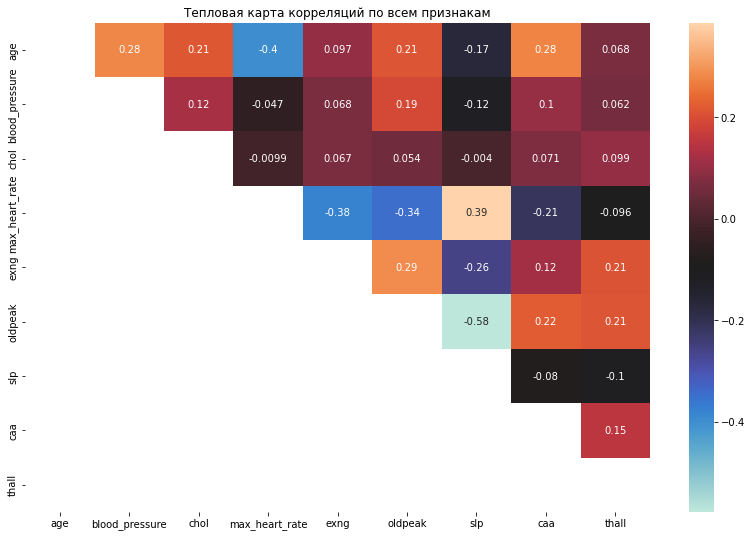

In [159]:
corr=df_1.corr()
plt.figure(figsize=(14,9))
matrix=np.tril(corr)
sns.heatmap(corr,annot=True, mask = matrix, cmap = sns.color_palette("icefire", as_cmap=True))
plt.title('Тепловая карта корреляций по всем признакам')
plt.show()

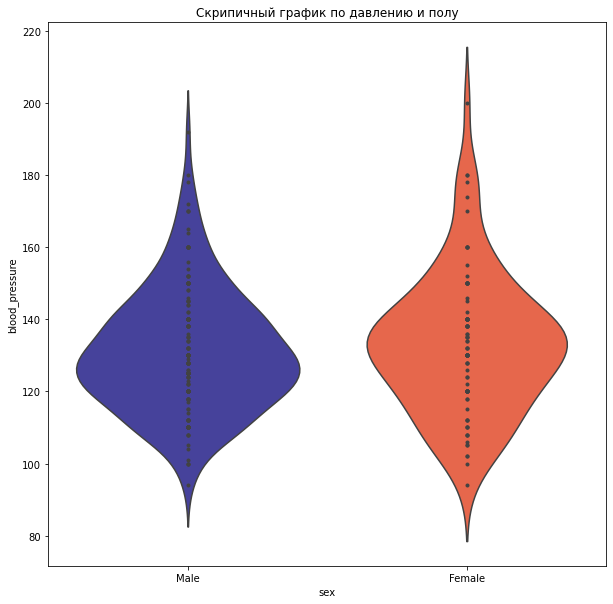

In [175]:
plt.figure(figsize=(10,10))
sns.violinplot(data=df_1, x = 'sex', 
               y = 'blood_pressure', palette= ['#3933AA', '#FF5733'], inner="points")
plt.title('Скрипичный график по давлению и полу')
plt.show()

In [1]:
plt.figure(figsize=(10,10))
sns.violinplot(data=df_1, x = 'sex', 
               y = 'max_heart_rate', palette= ['#3933AA', '#FF5733'], inner="points")
plt.title('Скрипичный график по максимальной частоте сердцебиения и полу')
plt.show()

NameError: name 'plt' is not defined

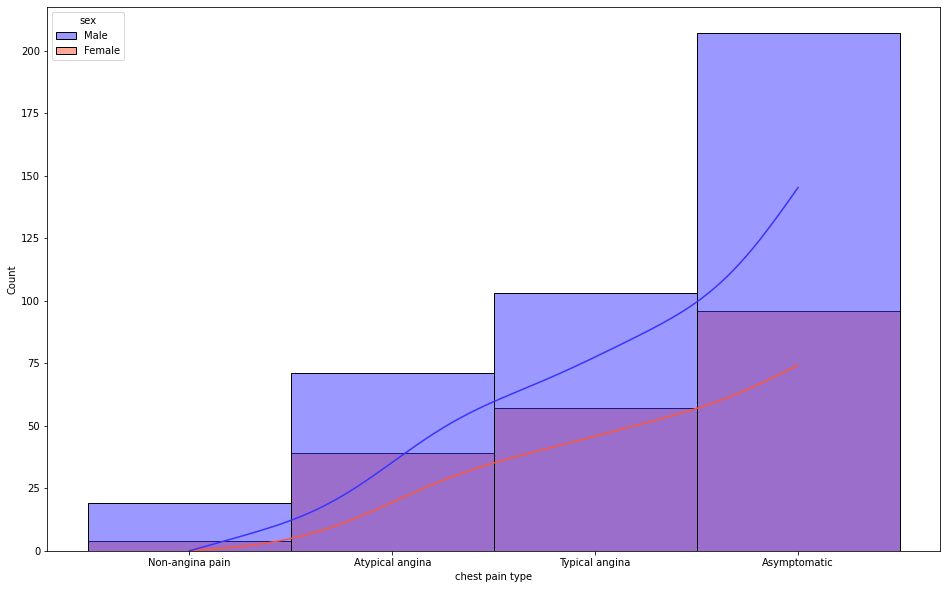

In [206]:
plt.figure(figsize=(16,10))
 
h = sns.histplot(data = df_1, x = 'chest_pain', palette = ['#3933FF', '#FF5733'], hue = 'sex', cumulative = True, kde = True)
h.set(xlabel = 'chest pain type')
plt.show()

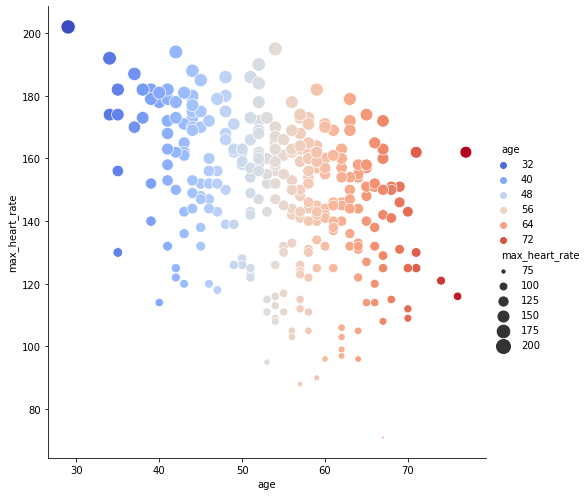

<Figure size 1440x1080 with 0 Axes>

In [183]:
sns.relplot(
    data=df_1,
    x="age", y="max_heart_rate",
    hue="age", size="max_heart_rate",
    palette= 'coolwarm', sizes = (5,200), height = 7
)
plt.figure(figsize = (20,15))
plt.show()

# Статистические гипотезы

In [188]:
male = df_1[df_1['sex'] == 'Male'].sample(75)
female = df_1[df_1['sex'] == 'Female'].sample(75)

In [189]:
#Зависит ли давление от пола (результат - нет)
results = stats.ttest_ind(male['blood_pressure'],female['blood_pressure'])
results

Ttest_indResult(statistic=-0.40452840001652557, pvalue=0.6864082213133572)

In [ ]:
male = df_1[df_1['sex'] == 'Male'].sample(75)
female = df_1[df_1['sex'] == 'Female'].sample(75)

In [190]:
#Зависит ли максимальная частота сердцебиения от пола (результат - нет)
results = stats.ttest_ind(male['max_heart_rate'],female['max_heart_rate'])
results

Ttest_indResult(statistic=-0.24456263355891267, pvalue=0.8071338365427102)

In [207]:
disease_0 = df_1[df_1['disease'] == 'Yes'].sample(75)
disease_1 = df_1[df_1['disease'] == 'No'].sample(75)

In [208]:
#Зависит ли максмальная частота сердцебиения от наличия заболевания (результат - да)
results = stats.ttest_ind(disease_0['max_heart_rate'],disease_1['max_heart_rate'])
results

Ttest_indResult(statistic=5.5873245035743055, pvalue=1.0761225626300941e-07)

In [191]:
cp_0 = df_1[df_1['chest_pain'] == 'Asymptomatic']
cp_1 = df_1[df_1['chest_pain'] == 'Typical angina']
cp_2 = df_1[df_1['chest_pain'] == 'Atypical angina']
cp_3 = df_1[df_1['chest_pain'] == 'Non-angina pain']

In [192]:
#Зависит ли максимальная частота сердцебиения от типа боли в груди (результат - да)
results = stats.f_oneway(cp_0['max_heart_rate'],cp_1['max_heart_rate'], cp_2['max_heart_rate'], cp_3['max_heart_rate'])
results

F_onewayResult(statistic=17.817962849045678, pvalue=1.1487000604896917e-10)